In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A - Opérateurs d'agrégation

In [83]:
def mean(x, w):
    return x @ w.T

In [84]:
x = np.random.rand(1, 2)
w = np.random.rand(1, 2)
w = w / w.sum()
x, w

(array([[0.72808902, 0.57852601]]), array([[0.80896287, 0.19103713]]))

In [85]:
mean(x, w)

array([[0.69951693]])

In [86]:
def plot_contour(operator, w=None, x1_range=[0, 1], x2_range=[0, 1], num_contours=10):
    x1_values = np.linspace(x1_range[0], x1_range[1], 100)
    x2_values = np.linspace(x2_range[0], x2_range[1], 100)
    
    x1, x2 = np.meshgrid(x1_values, x2_values)
    
    if w is not None:
        z = np.zeros(x1.shape)
        for i in range(x1.shape[0]):
            for j in range(x2.shape[0]):
                z[i, j] = operator(np.array([x1[i, j], x2[i, j]]), w)
    else:
        z = operator(x1, x2)

    contour_lines = plt.contour(x1, x2, z, levels=num_contours, colors='k')
    plt.clabel(contour_lines, inline=True, fontsize=8)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Lignes de Niveaux")

    plt.grid(True)
    plt.show()

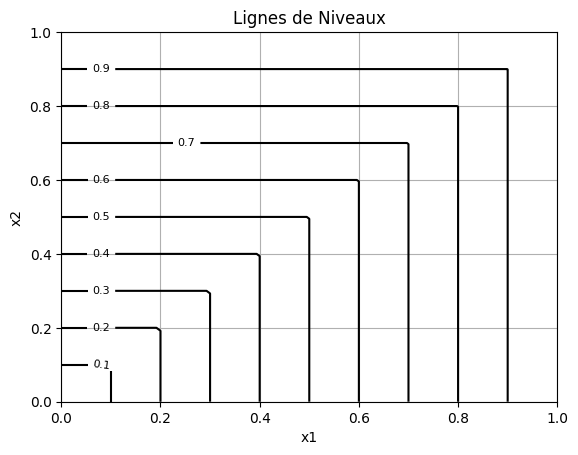

In [87]:
def maximum(a, b):
    return np.maximum(a, b)

plot_contour(maximum)

In [88]:
def owa(x, w):
    return np.sort(x) @ w.T

In [89]:
x = np.random.rand(1, 2)
w = np.random.rand(1, 2)
w = w / w.sum()
x, w

(array([[0.16033214, 0.36838619]]), array([[0.15699442, 0.84300558]]))

In [90]:
owa(x, w)

array([[0.33572287]])

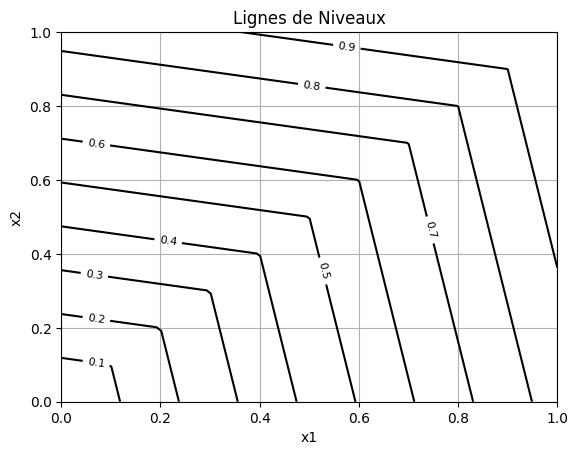

In [91]:
plot_contour(owa, w)

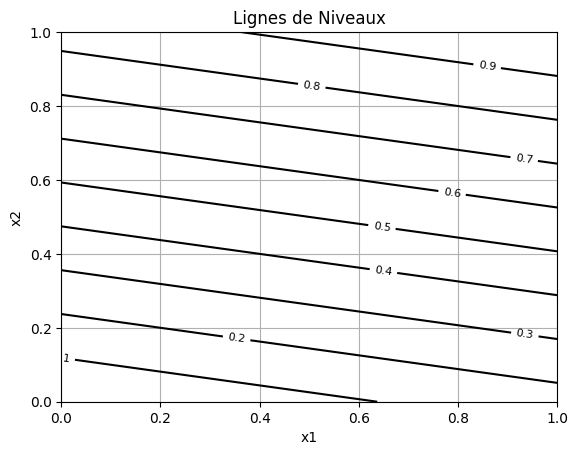

In [92]:
plot_contour(mean, w)

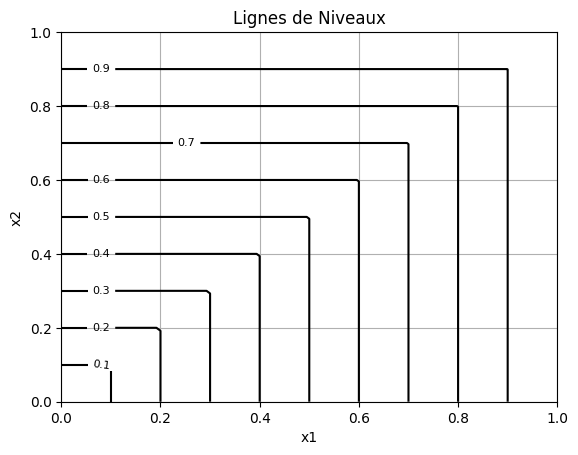

In [93]:
plot_contour(np.maximum)

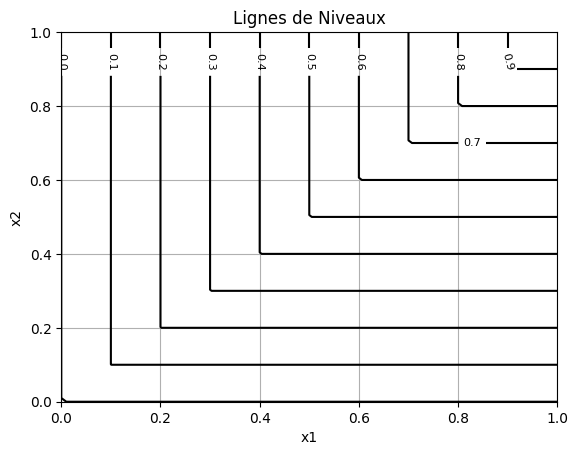

In [94]:
plot_contour(np.minimum)

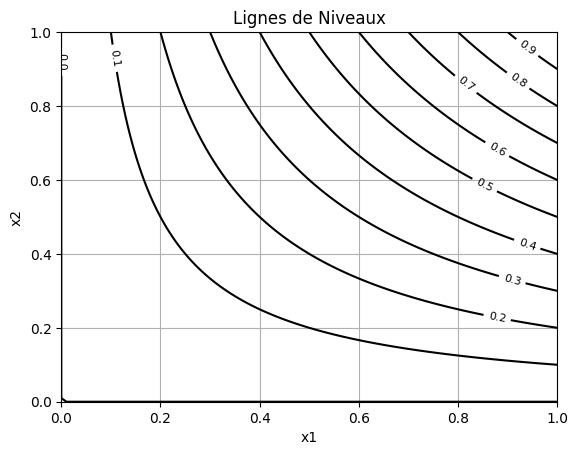

In [95]:
plot_contour(lambda a, b : a * b)

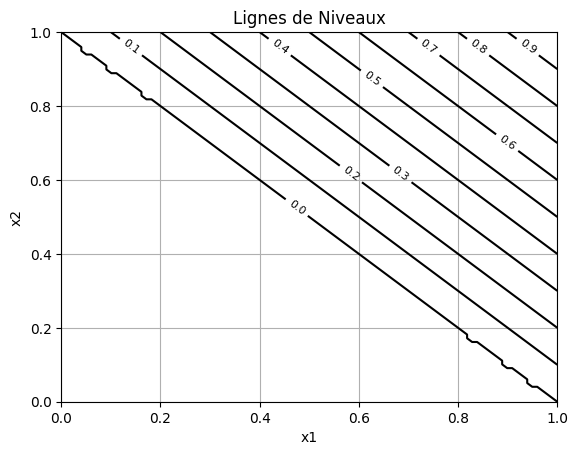

In [96]:
plot_contour(lambda a, b : np.maximum(a + b - 1, 0))

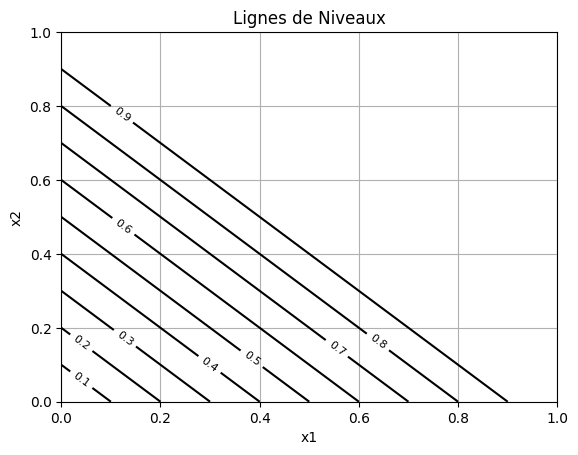

In [97]:
plot_contour(lambda a, b : np.minimum(a + b, 1))

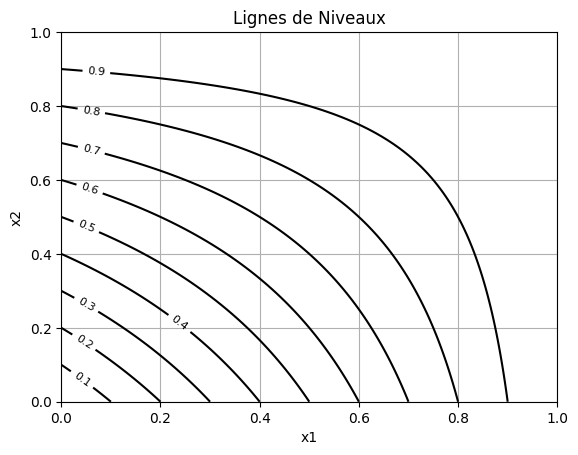

In [98]:
plot_contour(lambda a, b : a + b - a * b)

In [99]:
def godel(x, w):
    alpha = w[0]    
    beta = w[1]
    
    a = x[0]
    b = x[1]
    
    if a <= 1 - alpha and b <= 1 - beta:
        return np.minimum(a, b)
    
    if a > 1 - alpha and b > 1 - beta:
        return np.maximum(a, b)
    
    if a > 1 - alpha and b <= 1 - beta:
        return a
    
    return b

In [100]:
alpha_beta = np.array([0.6, 0.4])

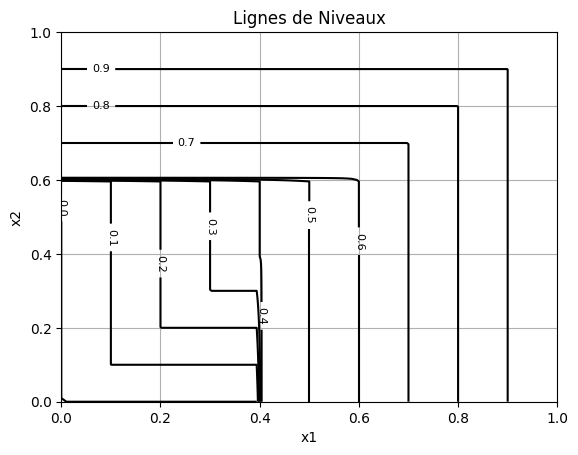

In [101]:
plot_contour(godel, alpha_beta)

In [102]:
import itertools

def findsubsets(s, n):
    return [frozenset(i) for i in itertools.combinations(s, n)]

In [103]:
def check_mu(mu, s):
    if frozenset() not in mu:
        print("frozenset([]) not in mu")
        return False
    
    if mu[frozenset()] != 0:  
        print("mu[frozenset([])] != 0")
        return False
    
    if frozenset(s) not in mu: 
        print("frozenset(s) not in mu")
        return False
    
    if mu[frozenset(s)] != 1: 
        print("mu[frozenset(s)] != 1")
        return False
    
    
    for l in range(len(s)):
     
        subsets_level = findsubsets(s, l)
        subsets_next_level = findsubsets(s, l+1)
        
        for level_set in subsets_level:
            
            if level_set not in mu: 
                print("frozenset([level_set]) not in mu :", level_set)
                return False
            
            for next_level_set in subsets_next_level:
                if level_set.issubset(next_level_set):
                    if mu[level_set] > mu[next_level_set]: 
                        print("mu[level_set] > mu[level_set] :", level_set)
                        return False
                    
    return True     

In [104]:
mu = {
   frozenset([0, 1]) : 1, 
   frozenset([1]) : 9/10, 
   frozenset([0]) : 1/2,
   frozenset() : 0,
}

s = np.arange(2)
check_mu(mu, s)

True

In [105]:
x = np.random.rand(1, 2)
x

array([[0.85712776, 0.02126997]])

In [106]:
sigma = list(np.argsort(x[0]))
sigma

[1, 0]

In [107]:
def choquet(x, mu):
    """
    mu : dict(frozenset : int)
    """
    
    dim = len(x)
    s = np.arange(dim)
    if not check_mu(mu, s): raise Exception()
    
    sigma = list(np.argsort(x))

    c = 0
    for i in range(dim):
        c += (mu[frozenset(sigma[i:])] - mu[frozenset(sigma[i+1:])]) * x[sigma[i]]
    
    return c

In [108]:
choquet(x[0], mu)

0.43919886609612263

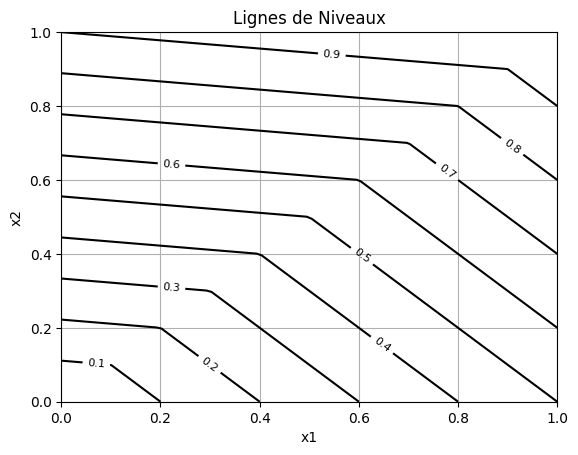

In [109]:
plot_contour(choquet, mu)

In [110]:
# Commentaire :

## B - LIME

## 1 - Préparation du dataset

In [111]:
from sklearn import datasets

In [112]:
breast_cancer = datasets.load_breast_cancer()

In [113]:
print(breast_cancer.keys())
print("Les classes du dataset sont : ", breast_cancer["target_names"])
print()

print("Shape : ", breast_cancer["data"].shape)
print("Les noms des attributs sont : ", breast_cancer["feature_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Les classes du dataset sont :  ['malignant' 'benign']

Shape :  (569, 30)
Les noms des attributs sont :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [114]:
from sklearn.model_selection import train_test_split

X = breast_cancer["data"]
y = breast_cancer["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Taille du train : ", X_train.shape)
print("Taille du test : ", X_test.shape)


Taille du train :  (426, 30)
Taille du test :  (143, 30)


In [115]:
feature_names = breast_cancer["feature_names"]
target_names = breast_cancer["target_names"]
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 2 - Apprentissage d'un modèle linéaire

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
logreg

LogisticRegression(class_weight='balanced', max_iter=10000)

In [118]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred.shape

(143,)

In [119]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_true = y_test, y_pred = y_pred)
mat_conf

array([[49,  3],
       [ 3, 88]], dtype=int64)

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.967032967032967

<Axes: >

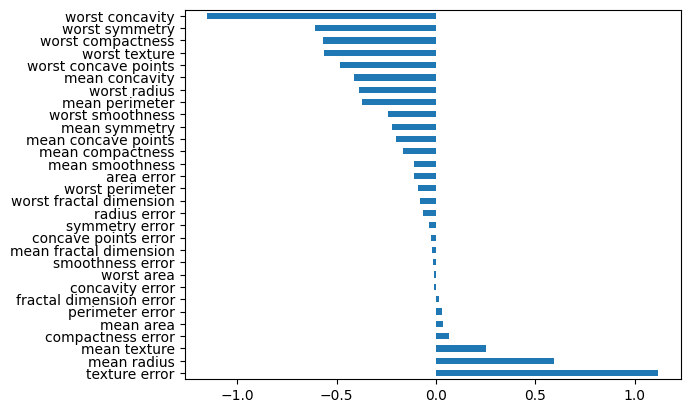

In [121]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<Axes: >

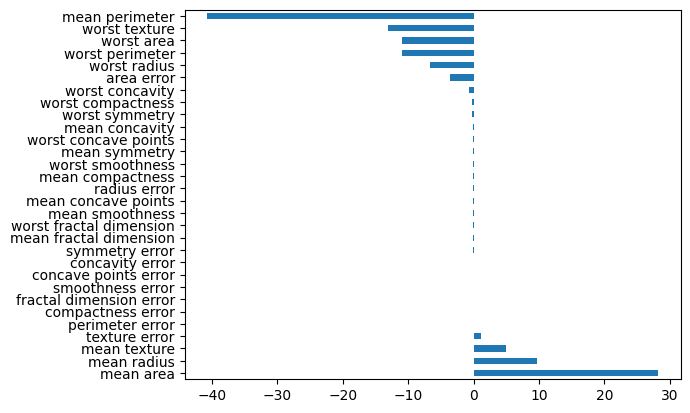

In [122]:
# il nous suffit de multiplier les coefs * les donnés du test (uniquement le premier exemple pour notre cas)
importance_firt_test = coefs * X_test[0]
pd.Series(importance_firt_test, index=feature_names).nlargest(coefs.size).plot(kind='barh')

## 3 - Explication avec LIME

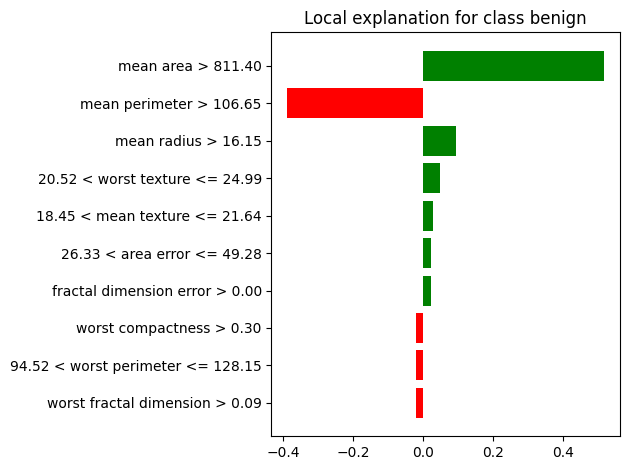

In [123]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Il est notable que Lime sélectionne les attributs les plus pertinents, qu'ils contribuent à la diminution ou à l'augmentation, et les présente dans un ordre trié.

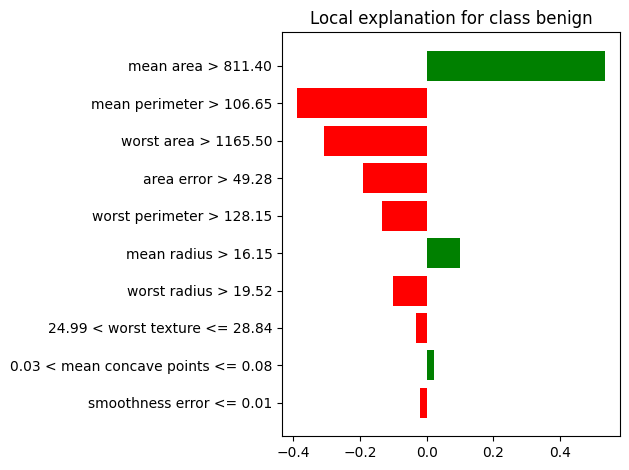

In [125]:
exp = explainer.explain_instance(X_test[1], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

## 4 - Expérimentations

Nous allons sélectionner plusieurs algorithmes pour fournir une explication du premier exemple de test. Nous comparerons l'importance attribuée à chaque attribut par les différents algorithmes.

In [140]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

k = len(np.unique(y_train))
cl_knn = KNeighborsClassifier(n_neighbors = k)
cl_knn.fit(X_train, y_train)
yhat_knn = cl_knn.predict(X_test)

cl_lr = LogisticRegression(class_weight='balanced', max_iter=10000)
cl_lr.fit(X_train, y_train)
yhat_lr = cl_lr.predict(X_test)

cl_svm = SVC(class_weight='balanced', probability=True)
cl_svm.fit(X_train, y_train)
yhat_svm = cl_svm.predict(X_test)

cl_rf = RandomForestClassifier(class_weight='balanced')
cl_rf.fit(X_train, y_train)
yhat_rf = cl_rf.predict(X_test)

In [141]:
print("F1 score Knn : ", f1_score(y_test, yhat_knn, average='binary'))
print("F1 score Regression Logistic : ", f1_score(y_test, yhat_lr, average='binary'))
print("F1 score SVM : ", f1_score(y_test, yhat_svm, average='binary'))
print("F1 score Random Forest : ", f1_score(y_test, yhat_rf, average='binary'))


F1 score Knn :  0.9325842696629213
F1 score Regression Logistic :  0.967032967032967
F1 score SVM :  0.945054945054945
F1 score Random Forest :  0.9891304347826088


In [155]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

indice_explain = 1
exp_knn = explainer.explain_instance(X_test[indice_explain], cl_knn.predict_proba, num_features=10)
exp_svm = explainer.explain_instance(X_test[indice_explain], cl_svm.predict_proba, num_features=10)
exp_lr = explainer.explain_instance(X_test[indice_explain], cl_lr.predict_proba, num_features=10)
exp_rf = explainer.explain_instance(X_test[indice_explain], cl_rf.predict_proba, num_features=10)

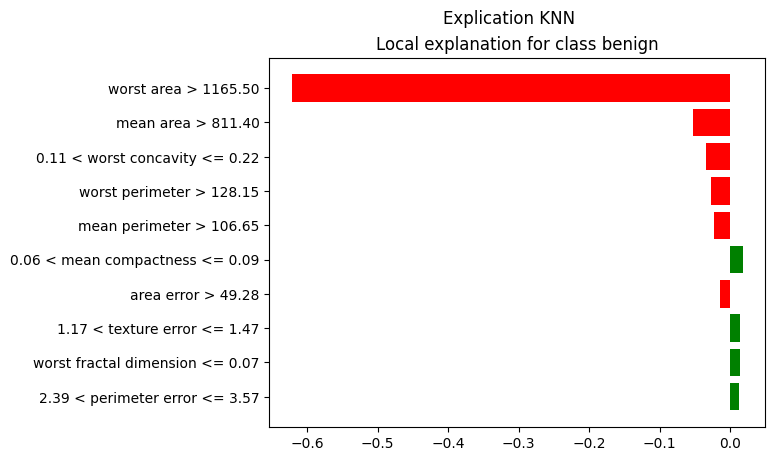

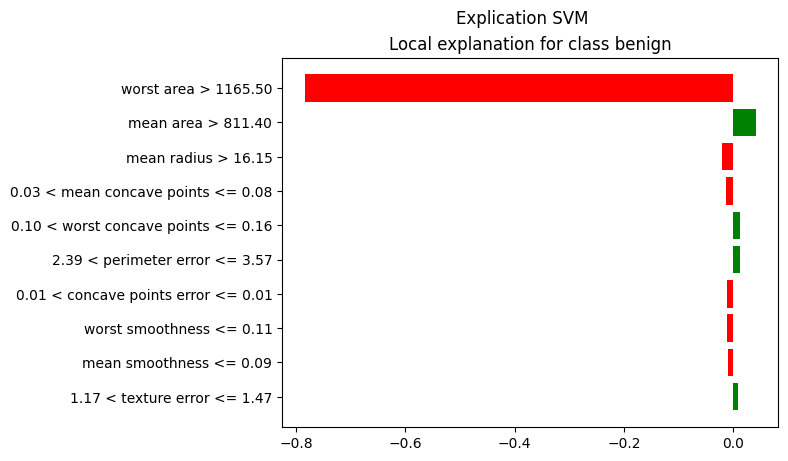

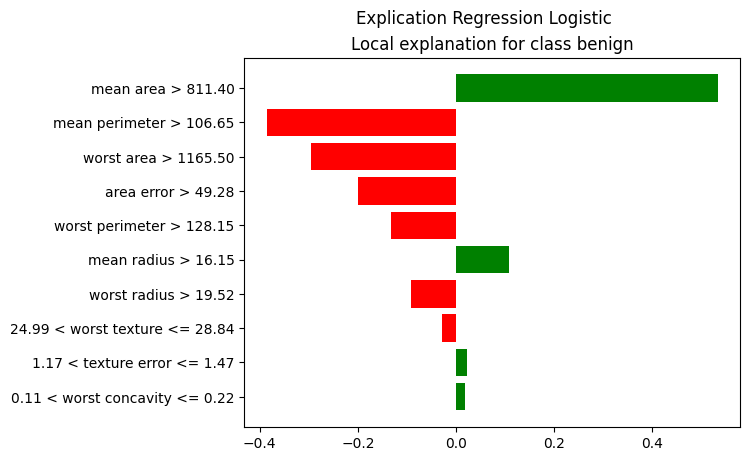

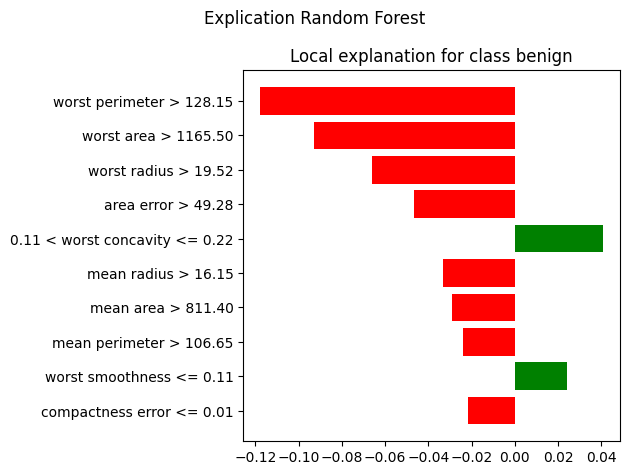

In [156]:
exp_knn.as_pyplot_figure().suptitle("Explication KNN")
exp_svm.as_pyplot_figure().suptitle("Explication SVM")
exp_lr.as_pyplot_figure().suptitle("Explication Regression Logistic")
exp_rf.as_pyplot_figure().suptitle("Explication Random Forest")
plt.tight_layout()

Il est important de noter que chaque modèle fournit une explication unique, et que selon le modèle, il y a des différences marquées dans la façon dont l'importance est attribuée aux attributs. Par exemple, SVM et KNN accordent une importance considérable à un seul attribut spécifique, tandis que Random Forest et Régression Logistique tendent à répartir l'importance sur un groupe de cinq à six attributs principalement.

## 5 - Données textuelles


In [51]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [53]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.304s at 13.082MB/s
n_samples: 2034, n_features: 7831
vectorize testing done in 0.221s at 12.995MB/s
n_samples: 1353, n_features: 7831


In [81]:
# nous avons 4 classes dans notre data sets
np.unique(y_train)

array([0, 1, 2, 3], dtype=int64)

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mat_conf = confusion_matrix(y_true = y_test, y_pred = y_pred)
mat_conf

array([[230,  26,  10,  53],
       [  3, 375,   9,   2],
       [  3,  39, 352,   0],
       [ 40,  32,  10, 169]], dtype=int64)

In [80]:
#f1 score de chaques classes
f1_score(y_test, y_pred, average=None)

array([0.77310924, 0.87108014, 0.9083871 , 0.71157895])

In [79]:
# feature_importances_ correspond aux coefficients (ou poids) w
clf.feature_importances_.sum()

1.0000000000000002

<Axes: >

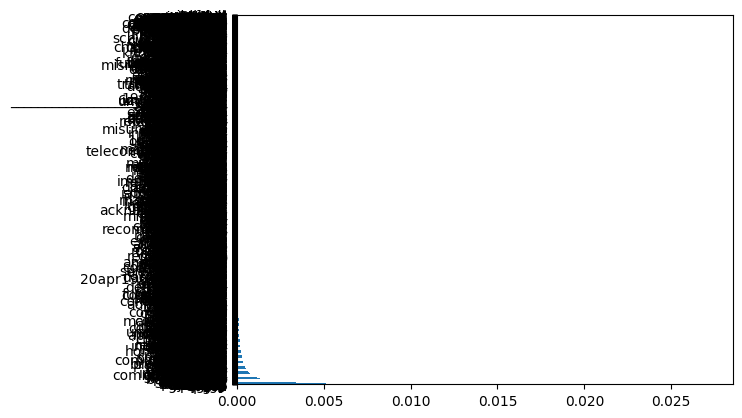

In [76]:
import pandas as pd
coefs = clf.feature_importances_
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

Comme illustré dans la figure ci-dessus, afficher tous les attributs n'est pas une approche efficace, car cela rend la lecture totalement illisible. Par conséquent, nous allons opter pour l'utilisation de Lime afin de présenter les 20 attributs les plus pertinents pour le premier exemple de test.

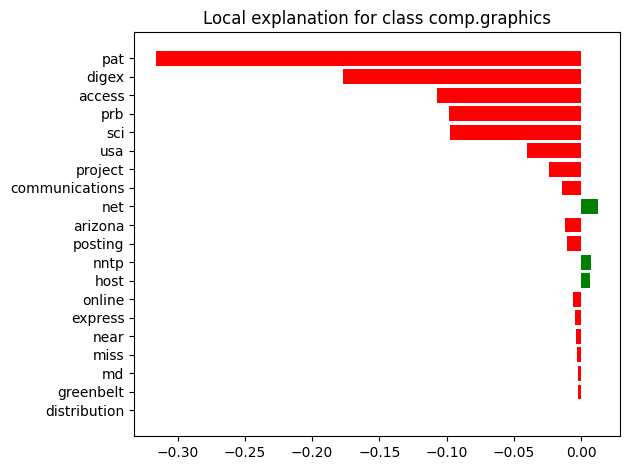

In [78]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], clf.predict_proba, num_features=20)

exp.as_pyplot_figure()
plt.tight_layout()

Il est observé que, à partir du septième attribut, l'importance des autres attributs devient négligeable, étant inférieure à 5 %. Pour expliquer le premier exemple, nous allons donc considérer les cinq ou six premiers attributs, car ce sont les plus pertinents.